In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
MODEL_DATA_DIR = "/content/drive/MyDrive/Applied ML Group 18/model_data/"
"""
X_TRAIN2_FILE = MODEL_DATA_DIR + 'x_train_2.csv'
Y_TRAIN2_FILE = MODEL_DATA_DIR + 'y_train_2.csv'
X_TEST2_FILE = MODEL_DATA_DIR + 'x_test_2.csv'
Y_TEST2_FILE = MODEL_DATA_DIR + 'y_test_2.csv'
LABEL_MAP_FILE = MODEL_DATA_DIR +  'label_map.csv'
"""
X_TRAIN2_FILE = 'x_train_2.csv'
Y_TRAIN2_FILE = 'y_train_2.csv'
X_TEST2_FILE = 'x_test_2.csv'
Y_TEST2_FILE = 'y_test_2.csv'
LABEL_MAP_FILE = 'label_map.csv'

X_train2 = pd.read_csv(X_TRAIN2_FILE, index_col=0)
y_train2 = pd.read_csv(Y_TRAIN2_FILE, index_col=0)
X_test2 = pd.read_csv(X_TEST2_FILE, index_col=0)
y_test2 = pd.read_csv(Y_TEST2_FILE, index_col=0)
LABEL_MAP = pd.read_csv(LABEL_MAP_FILE)

feature_names = X_train2.columns
X_train2.head()

,Age,Hours per day,Anxiety,Depression,Insomnia,OCD,Frequency [Classical] ordinal,Frequency [Country] ordinal,Frequency [EDM] ordinal,Frequency [Folk] ordinal,...,Exploratory ordinal,Music effects ordinal,Primary streaming service_Apple Music,Primary streaming service_I do not use a streaming service.,Primary streaming service_Other streaming service,Primary streaming service_Pandora,Primary streaming service_Spotify,Primary streaming service_YouTube Music,Foreign languages_No,Foreign languages_Yes
0,22,2,7,7,8,3,1,0,1,1,...,1,1,0,0,0,0,0,1,1,0
1,18,2,5,7,2,0,2,1,2,0,...,0,1,0,0,0,0,1,0,1,0
2,31,2,8,9,6,2,1,1,0,1,...,0,1,0,0,0,0,1,0,1,0
3,17,3,8,10,9,2,1,1,0,2,...,0,1,1,0,0,0,0,0,1,0
4,18,3,8,9,0,0,1,0,0,2,...,0,1,0,0,0,0,1,0,0,1


In [4]:
LABEL_MAP

,Encoded Value,Fav genre
0,0,Video game music
1,1,Jazz
2,2,R&B
3,3,K pop
4,4,Rock
5,5,Country
6,6,EDM
7,7,Hip hop
8,8,Pop
9,9,Rap


In [5]:
X_train2 = np.asarray(X_train2)
y_train2 = np.asarray(y_train2['Fav genre'])
X_test2 = np.asarray(X_test2)
y_test2 = np.asarray(y_test2['Fav genre'])

X_train2

array([[22,  2,  7, ...,  1,  1,  0],
       [18,  2,  5, ...,  0,  1,  0],
       [31,  2,  8, ...,  0,  1,  0],
       ...,
       [17,  9,  3, ...,  0,  0,  0],
       [17, 10,  2, ...,  0,  0,  0],
       [17, 10,  2, ...,  0,  0,  0]])

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report , accuracy_score

#Default model
randomforest_classifier = RandomForestClassifier(random_state=42)
randomforest_classifier.fit(X_train2, y_train2)
y_pred = randomforest_classifier.predict(X_test2)
accuracy = accuracy_score(y_test2, y_pred)
accuracy

0.6232876712328768

In [7]:
#Balanced Random Forest
randomforest_classifier_balanced = RandomForestClassifier(random_state=42, class_weight='balanced')
randomforest_classifier_balanced.fit(X_train2, y_train2)
y_pred_balanced = randomforest_classifier_balanced.predict(X_test2)
accuracy_balanced = accuracy_score(y_test2, y_pred_balanced)
accuracy_balanced

0.6232876712328768

In [8]:
#Hyperparameter tuning to enhance model performance
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [10, 50, 100, 125, 200],
    'max_depth': [1, 3, 5, 10, 20, 30, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search_rf = GridSearchCV(estimator=randomforest_classifier, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search_rf.fit(X_train2, y_train2)

print(f'Best params: {grid_search_rf.best_params_}')
random_forest_tune = RandomForestClassifier(n_estimators = grid_search_rf.best_params_['n_estimators'],
                                            max_depth= grid_search_rf.best_params_['max_depth'],
                                            min_samples_split= grid_search_rf.best_params_['min_samples_split'],
                                            min_samples_leaf = grid_search_rf.best_params_['min_samples_leaf'],
                                            random_state=42)
random_forest_tune.fit(X_train2, y_train2)

y_pred_rf = random_forest_tune.predict(X_test2)
accuracy_test_best_rf = accuracy_score(y_test2, y_pred_rf)
accuracy_test_best_rf

Best params: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 125}


0.6232876712328768

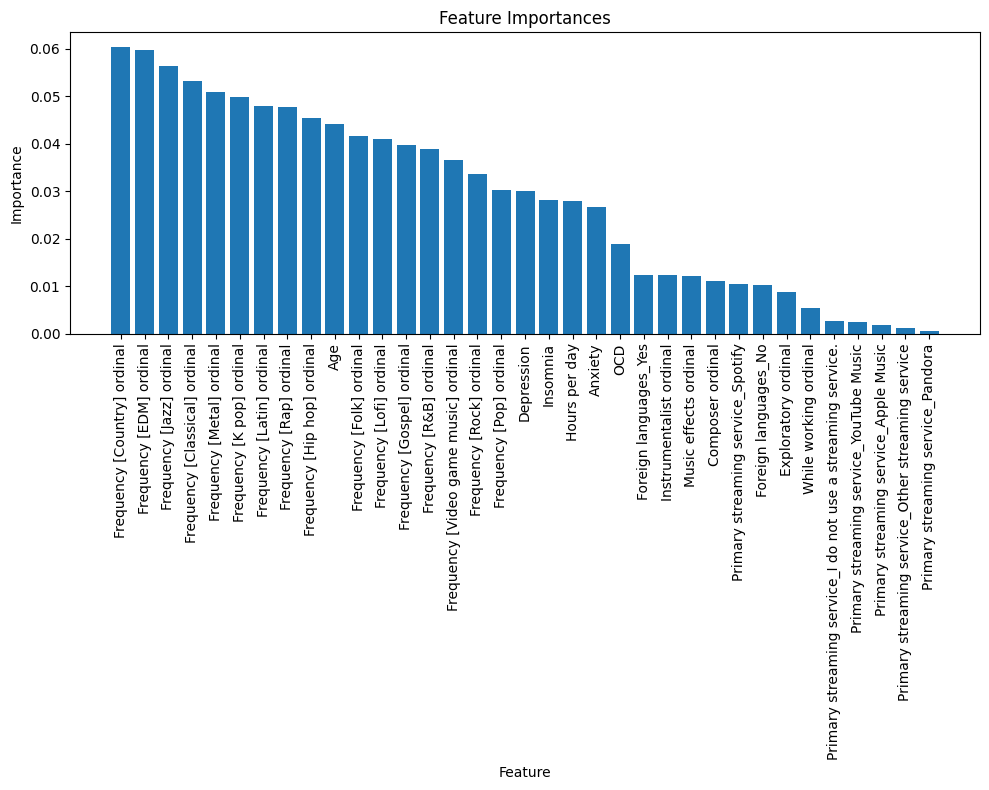

In [9]:
importances = random_forest_tune.feature_importances_
sorted_indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 8))
plt.title('Feature Importances')
plt.bar(range(len(sorted_indices)), importances[sorted_indices], align='center')
plt.xticks(range(len(sorted_indices)), [feature_names[i] for i in sorted_indices], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')

# Show the plot
plt.tight_layout()
plt.show()